# **TITANIC SURVIVAL PREDICTION**

### **Description**  
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

![picture](https://drive.google.com/uc?export=view&id=1KSUGmQnyxouemFWeARrCV90GGztxBlm_)

The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

I took the titanic test file and the gender_submission and put them together in excel to make a csv. This is great for making charts to help you visualize. This also will help you know who died or survived. At least 70% right, but its up to you to make it 100% Thanks to the titanic beginners competitions for providing with the data. P

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d brendan45774/test-file

test-file.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/test-file.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### **Creating DataFrame**

In [ ]:
df=pd.read_csv('tested.csv')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  418
Number of Columns:  12


### **Exploring the DataFrame**

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### **Visual Findings**

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64


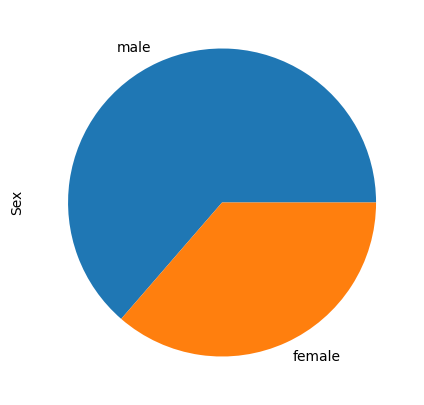

In [ ]:
k=df.groupby('Sex').Survived.value_counts()
print(k)
plt.figure(figsize=(5,5))
df.Sex.value_counts().plot(kind = 'pie')
plt.show()

3    218
1    107
2     93
Name: Pclass, dtype: int64


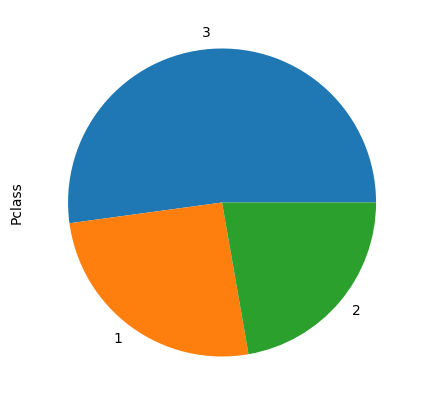

In [ ]:
plt.figure(figsize=(5,5))
df.Pclass.value_counts().plot(kind='pie')
print (df.Pclass.value_counts())

### **Checking for Null Values**

In [ ]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Note: -
1. Around **20.5%** Data is Missing from **Age** Column
2. Around **78.2%** Data is Missing from Cabin Column

Lets Verify It

In [ ]:
cols=[var for var in df.columns if
      df[var].isnull().mean()*100>50 and df[var].isnull().mean()*100<100]
cols

['Cabin']

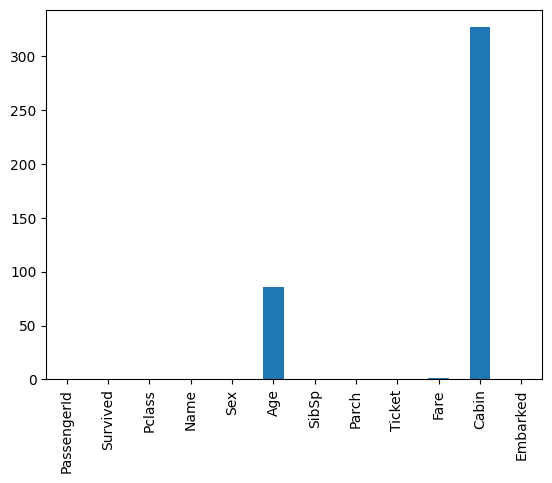

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.show()

In [ ]:
# Therefore we will drop Cabin Column
# But for Age we will check if Data Missing is At Random or Purposly Miising, If data is Missing at Random we will perform Imputation
new_df=df[cols].dropna()
df.shape,new_df.shape

((418, 12), (91, 1))

In [ ]:
new_df=df['Age'].dropna()
df.shape,new_df.shape

((418, 12), (332,))

In [ ]:
new_df

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 332, dtype: float64

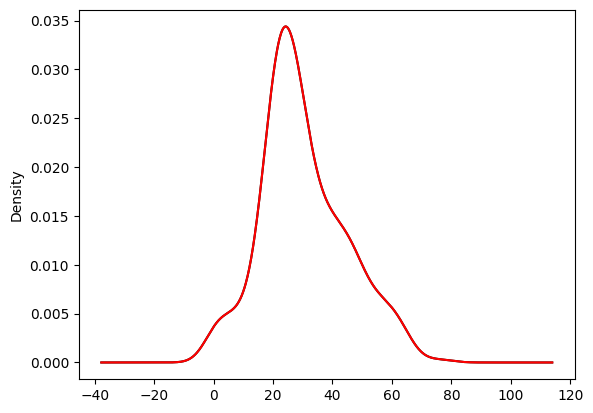

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['Age'].plot.density(color='black')

#data after cca
new_df.plot.density(color='red')
plt.show()

Note: -
Since the plot black and red overlapp with each other therefore data is missing at random we will go for imputation for Age Column

### **Extracting Title from Name Column**

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### **Droping the Columns**
1. Passenger ID we are dropping as we dont required for our model
2. Name we are droping as we have fetched out the Title column from it and we dont required another info from Name column
3. Ticket, Fare and Cabin is not required column
4. Embarked is not importatnt because the surival rate does not depend from where the person came to Voyge (Southampton, Cherbourg, and Queenstown)

In [ ]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],
        axis = 1,
        inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Title     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


### **Reindexing the columns**

In [ ]:
df=df.iloc[:,[1,2,3,4,5,6,0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Title     418 non-null    object 
 6   Survived  418 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [ ]:
df

,Pclass,Sex,Age,SibSp,Parch,Title,Survived
0,3,male,34.5,0,0,Mr,0
1,3,female,47.0,1,0,Mrs,1
2,2,male,62.0,0,0,Mr,0
3,3,male,27.0,0,0,Mr,0
4,3,female,22.0,1,1,Mrs,1
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,Mr,0
414,1,female,39.0,0,0,Dona,1
415,3,male,38.5,0,0,Mr,0
416,3,male,NaN,0,0,Mr,0


### **Seeing the Correlation**

<ipython-input-22-c5889680c903>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


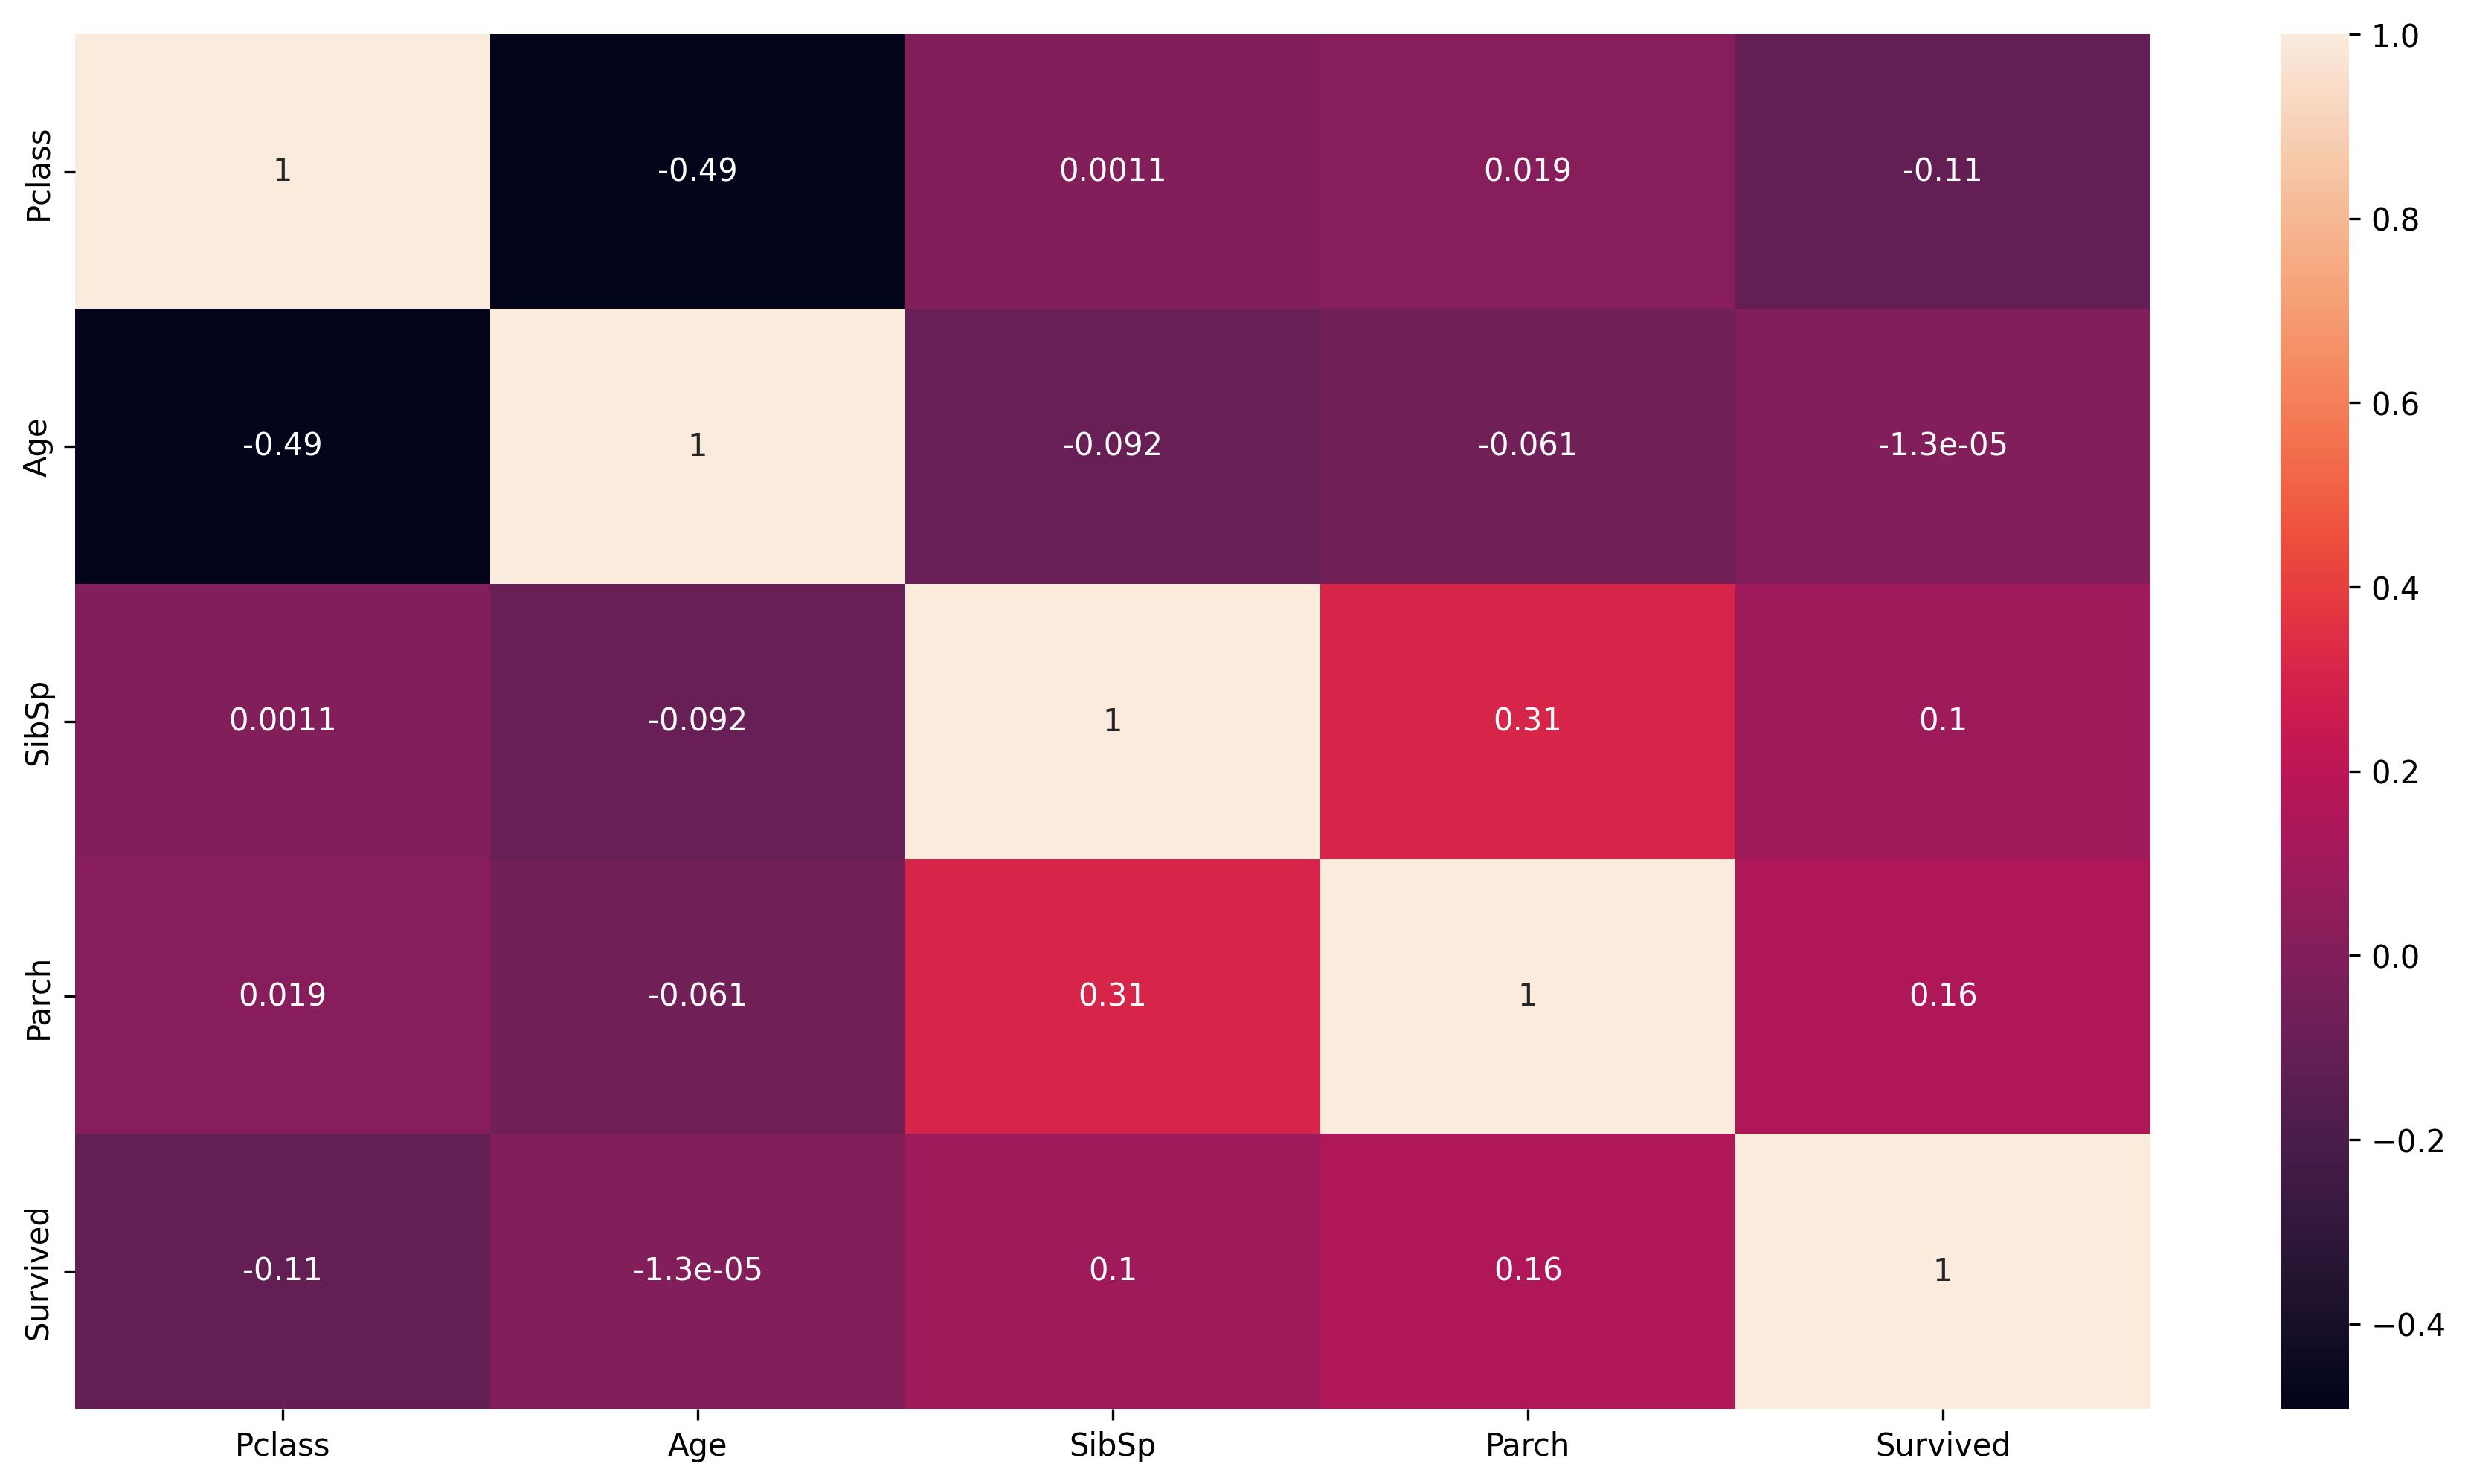

In [ ]:
fig=plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(), annot = True)
plt.show()

### **Splitting the Model**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=["Survived"],axis=1),
    df['Survived'],
    test_size = 0.25,
    random_state = 0)

In [ ]:
x_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Title
208,1,female,33.0,0,0,Miss
56,3,male,35.0,0,0,Mr
8,3,female,18.0,0,0,Mrs
315,3,female,17.0,0,0,Miss
155,3,male,24.0,0,0,Mr


In [ ]:
y_train.head(5)

208    1
56     0
8      1
315    1
155    0
Name: Survived, dtype: int64

### **Preprocessing Pipeline**

In [ ]:
numeric_process=Pipeline(
    steps=[('imputataion',SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("Standardise",StandardScaler())])
numeric_process

Pipeline(steps=[('imputataion', SimpleImputer()),
                ('Standardise', StandardScaler())])

In [ ]:

categorical_process=Pipeline(
    steps=[('cat_imputation',SimpleImputer(fill_value="missing",strategy="constant")),
          ('onehot',OneHotEncoder(handle_unknown='ignore'))])
categorical_process

Pipeline(steps=[('cat_imputation',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Title,Survived
0,3,male,34.5,0,0,Mr,0
1,3,female,47.0,1,0,Mrs,1
2,2,male,62.0,0,0,Mr,0
3,3,male,27.0,0,0,Mr,0
4,3,female,22.0,1,1,Mrs,1


In [ ]:
preprocessor=ColumnTransformer([
    ('numerical',numeric_process,[0,2,3,4]),
    ('tnf1',OrdinalEncoder(categories=[['Ms', 'Rev', 'Col', 'Dr','Dona','Mr','Miss','Mrs','Master']]),[5]),
    ('categorical',categorical_process,[1])
],remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputataion',
                                                  SimpleImputer()),
                                                 ('Standardise',
                                                  StandardScaler())]),
                                 [0, 2, 3, 4]),
                                ('tnf1',
                                 OrdinalEncoder(categories=[['Ms', 'Rev', 'Col',
                                                             'Dr', 'Dona', 'Mr',
                                                             'Miss', 'Mrs',
                                                             'Master']]),
                                 [5]),
                                ('categorical',
                                 Pipeline(steps=[('cat_imputation',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [1])])

In [ ]:
x_train=preprocessor.fit_transform(x_train)

In [ ]:
x_train

array([[-1.55652696e+00,  1.97936943e-01, -5.60183390e-01, ...,
         6.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 8.43438254e-01,  3.52743155e-01, -5.60183390e-01, ...,
         5.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.43438254e-01, -9.63109649e-01, -5.60183390e-01, ...,
         7.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.43438254e-01, -2.27896245e+00,  8.42515819e-01, ...,
         6.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 8.43438254e-01, -2.74991074e-16, -5.60183390e-01, ...,
         5.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.43438254e-01, -5.76094118e-01,  8.42515819e-01, ...,
         5.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
x_test=preprocessor.transform(x_test)

### **ML Models**

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Naive Bayes":RandomForestClassifier(),
        "KNN Classifier": KNeighborsClassifier()}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision=precision_score(y_train,y_train_pred)
  model_train_recall=recall_score(y_train,y_train_pred)
  model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision=precision_score(y_test,y_test_pred)
  model_test_recall=recall_score(y_test,y_test_pred)
  model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training Set')
  print("-Accuracy: {:.4f}".format(model_train_accuracy))
  print("-F1 Score: {:.4f}".format(model_train_f1))
  print("-Precision: {:.4f}".format(model_train_precision))
  print("-Recall {:.4f}".format(model_train_recall))
  print("-ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

  print('--------------------------------')

  print('Model performance for Testing Set')
  print("-Accuracy: {:.4f}".format(model_test_accuracy))
  print("-F1 Score: {:.4f}".format(model_test_f1))
  print("-Precision: {:.4f}".format(model_test_precision))
  print("-Recall: {:.4f}".format(model_test_recall))
  print("-ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
  print('-----------------------------------------------')
  print('-----------MOVINING TO NEXT ALGO---------------')
  print('-----------------------------------------------')

Logistic Regression
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
-ROC AUC Score: 1.0000
--------------------------------
Model performance for Testing Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-ROC AUC Score: 1.0000
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Decision Tree
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
-ROC AUC Score: 1.0000
--------------------------------
Model performance for Testing Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-ROC AUC Score: 1.0000
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0

Note
1. Logistic Regression, Decision Tree, Random Forest, Naive Bayes has 100% Accuracy on the Dataset
2. KNN Classifier has a Accuracy of 0.9872
3. Therefore opt for any one model among Logistic Regression, Decision Tree, Random Forest, Naive Bayes for high accuracy

### **Prediction**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
x_test1=[[3,'male',34.5,0,0,'Mr']]
x_test1=preprocessor.transform(x_test1)
y_test_pred1=model.predict(x_test1)
y_test_pred1

array([0])

In [ ]:
x_test2=[[3,'female',22,1,1,'Mrs']]
x_test2=preprocessor.transform(x_test2)
y_test_pred2=model.predict(x_test2)
y_test_pred2

array([1])